# Importing Libraries

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import matplotlib.ticker as mticker
import warnings

# Reading Data

In [2]:
retails = pd.read_csv('Retail_Transaction_Dataset 1.csv')
retails.head()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
0,109318,C,7,80.079844,12/26/2023 12:32,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764
1,993229,C,4,75.195229,8/5/2023 0:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546
2,579675,A,8,31.528816,3/11/2024 18:51,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651
3,799826,D,5,98.880218,10/27/2023 22:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769
4,121413,A,7,93.188512,12/22/2023 11:38,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484


# Data Cleaning and Preparation

## Data Information

In [3]:
retails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CustomerID          100000 non-null  int64  
 1   ProductID           100000 non-null  object 
 2   Quantity            100000 non-null  int64  
 3   Price               100000 non-null  float64
 4   TransactionDate     100000 non-null  object 
 5   PaymentMethod       100000 non-null  object 
 6   StoreLocation       100000 non-null  object 
 7   ProductCategory     100000 non-null  object 
 8   DiscountApplied(%)  100000 non-null  float64
 9   TotalAmount         100000 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 7.6+ MB


## Dropping `CustomerID`, `ProductID` Columns

In [4]:
retails.drop(['CustomerID', 'ProductID'], axis=1, inplace = True)

## Moving `ProductCategory` to First Position

In [5]:
retails = retails[['ProductCategory'] + [col for col in retails if col != 'ProductCategory']]

## Modifying `StoreLocation`

In order to make the data analysis more effective we have to modify the `StoreLocation` column so that instead of containing description of location, it should contain only the state name. In order to modify the column, following steps will be taken:
1.  Upon closer examination, I found that states are located as two words abbreviations    at the last 7th, 8th positions like `176 Andrew Cliffs Baileyfort, HI 93354.


In [6]:
retails['State'] = [loc[-8:-6] for loc in retails['StoreLocation']]
retails['State'].value_counts().head(3)

State
AE    3681
AA    3594
AP    3531
Name: count, dtype: int64

2. Converting to full forms for better readibilty. The full forms are saved as a dictionary named `state_mapping` as values to their abbreviations(keys).

In [7]:
state_mapping = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AS': 'American Samoa',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'DC': 'District of Columbia',
    'FL': 'Florida',
    'GA': 'Georgia',
    'GU': 'Guam',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'MP': 'Northern Mariana Islands',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PW': 'Palau',
    'PA': 'Pennsylvania',
    'PR': 'Puerto Rico',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VI': 'U.S. Virgin Islands',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming',
    'AE': 'Armed Forces Europe',
    'AA': 'Armed Forces Americas',
    'AP': 'Armed Forces Pacific',
    'FM': 'Federated States of Micronesia',
    'MH': 'Marshall Islands'
}


In [8]:
retails['State'] = retails['State'].replace(state_mapping)
retails['State'].head()

0      Hawaii
1     Montana
2    Missouri
3    Missouri
4    Virginia
Name: State, dtype: object

3. Finally dropping the `StoreLocation` column as it is no longer needed.

In [9]:
retails.drop('StoreLocation', axis = 1, inplace = True)

## Missing Values

In [10]:
retails.isna().sum().rename_axis('Columns').reset_index(name = 'Missing values')

,Columns,Missing values
0,ProductCategory,0
1,Quantity,0
2,Price,0
3,TransactionDate,0
4,PaymentMethod,0
5,DiscountApplied(%),0
6,TotalAmount,0
7,State,0


There are no missing values in this dataset.

## Duplicate Rows

In [11]:
print(f"Number of duplicate rows : {len(retails[retails.duplicated()])}")

Number of duplicate rows : 0


There are no duplicate rows in the dataset.

## Investigating Data Types

In [12]:
retails.dtypes

ProductCategory        object
Quantity                int64
Price                 float64
TransactionDate        object
PaymentMethod          object
DiscountApplied(%)    float64
TotalAmount           float64
State                  object
dtype: object

### `TransactionDate` column has **object** data type, changing to **"datetime"**

In [13]:
retails['TransactionDate'] = pd.to_datetime(retails['TransactionDate'])

### Setting Data Types of `ProductCategory` and `PaymentMethod` columns to "category" 

In [14]:
retails[['ProductCategory', 'PaymentMethod']] = retails[['ProductCategory', 'PaymentMethod']].astype('category')
retails[['ProductCategory', 'PaymentMethod']].dtypes

ProductCategory    category
PaymentMethod      category
dtype: object

# Descriptive Statistics

## Numerical Columns

In [15]:
retails.describe()

,Quantity,Price,TransactionDate,DiscountApplied(%),TotalAmount
count,100000.000000,100000.000000,100000,100000.000000,100000.000000
mean,5.009290,55.067344,2023-10-29 15:40:05.471399936,10.020155,248.334955
min,1.000000,10.000430,2023-04-29 22:27:00,0.000046,8.274825
25%,3.000000,32.549474,2023-07-30 06:45:15,5.001013,95.163418
50%,5.000000,55.116789,2023-10-30 05:12:30,10.030353,200.368393
75%,7.000000,77.456763,2024-01-29 05:44:00,15.018367,362.009980
max,9.000000,99.999284,2024-04-28 22:22:00,19.999585,896.141242
std,2.579808,25.971567,NaN,5.779534,184.554792


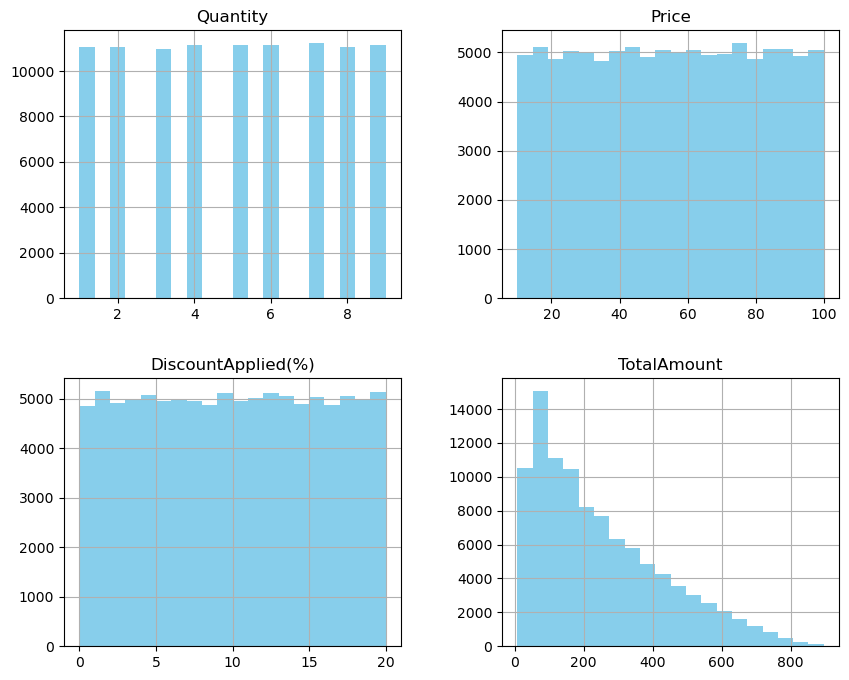

In [16]:
retails_num = retails.select_dtypes(include=['int64', 'float64'])
retails_num.hist(bins=20, figsize=(10, 8), color='skyblue')
plt.show()

## Non Numerical Columns

In [17]:
retails.describe(include = ['object', 'category'])

,ProductCategory,PaymentMethod,State
count,100000,100000,100000
unique,4,4,62
top,Clothing,PayPal,Armed Forces Europe
freq,25056,25067,3681


In [18]:
retails.columns


Index(['ProductCategory', 'Quantity', 'Price', 'TransactionDate',
       'PaymentMethod', 'DiscountApplied(%)', 'TotalAmount', 'State'],
      dtype='object')

# Insights

## Sales Performance by Product Category

### How do sales vary across different product categories?

In [48]:
retails_prod = retails.groupby('ProductCategory')
Product_sales = retails_prod['Quantity'].sum().sort_values(ascending=False).rename('Total Sales')
Product_sales
warnings.filterwarnings("ignore")

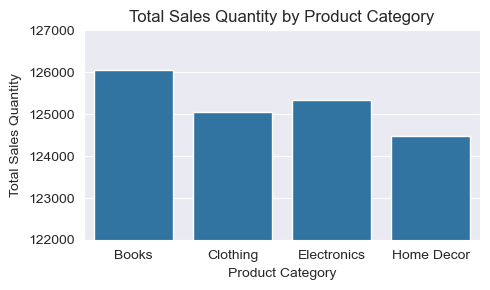

In [49]:
plt.figure(figsize=(5, 3))
sns.barplot(data=retails, x='ProductCategory', y='Quantity', estimator=sum, ci=None)
plt.title('Total Sales Quantity by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Quantity')
plt.ylim(122000, 127000)  # Adjust the range of y-axis here
plt.tight_layout()
plt.show()
warnings.filterwarnings("ignore")

### Finding:
- Almost all categories does not seem to experience different Sales.
- There are a little more sales of `Books` compared to other categories. 

### Which product categories contribute the most to total revenue?

In [21]:
total_revenue = round(sum(retails['TotalAmount']), 0)
prod_cont_rev = (((retails_prod['TotalAmount'].sum()/total_revenue)*100).round(2)).rename("Revenue Contribution").astype(str)+"%"
prod_cont_rev


ProductCategory
Books           25.2%
Clothing       24.99%
Electronics    24.95%
Home Decor     24.86%
Name: Revenue Contribution, dtype: object

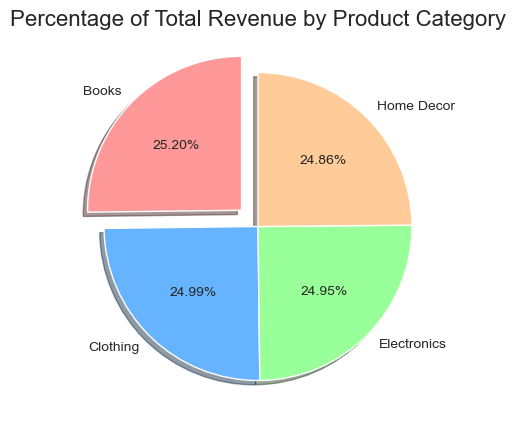

In [50]:
plt.figure(figsize=(6, 5))
sum_total_amount_by_category = retails.groupby('ProductCategory')['TotalAmount'].sum()
explode_values = [0.15 if amount == sum_total_amount_by_category.max() else 0 for amount in sum_total_amount_by_category]
plt.pie(sum_total_amount_by_category, labels=sum_total_amount_by_category.index, autopct='%1.2f%%', startangle=90, explode=explode_values, shadow=True, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Percentage of Total Revenue by Product Category', fontsize=16)
plt.show()
warnings.filterwarnings("ignore")

### Finding:
- As we can see, all categories approximately contribute the same towards total revenue
- `Books` have contributed **25.2%**.
- Others have contributed slighlty less than **25%**

## Are there any seasonal trends or patterns in sales for different product categories?

In [23]:
import calendar
retails['month'] = retails['TransactionDate'].dt.month.apply(lambda x: calendar.month_abbr[x])
retails['DayOfWeek'] = retails['TransactionDate'].dt.day_name()

### Total Monthly Revenue

In [24]:
# Setting month as category
retails['month']=retails['month'].astype('category')
retails['month']=retails['month'].cat.set_categories(
    new_categories = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    ordered = True,
)

In [51]:
retails.groupby('month')['TotalAmount'].sum().rename('Total Revenue').round(-1).apply(lambda x: "$ {:,.0f}".format(x))
warnings.filterwarnings("ignore")

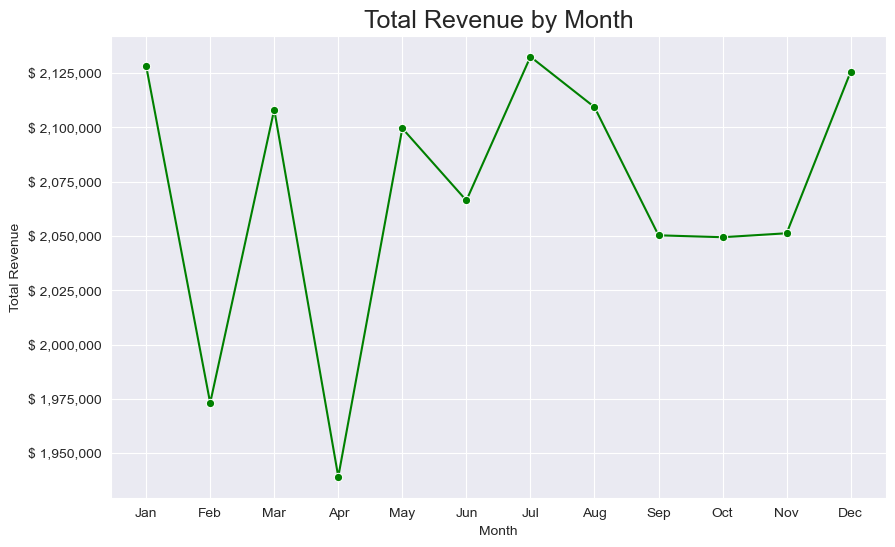

In [52]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
sns.lineplot(data=retails, x='month', y='TotalAmount', marker='o', color='green', estimator = sum, ci =None) 
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('$ {x:,.0f}'))
plt.title('Total Revenue by Month', fontsize = 18)
plt.grid(True)
plt.show()
warnings.filterwarnings("ignore")

### Finding:
- In `Jan`, `Jul` and `Dec`, the highest revenue is generated equal and greater than **2.1 million**.
- `Feb` and `Apr` are the months with lowest revenue less than **1.98 million**.
- In remaining months there is not much fluctuation.

### Total Monthly Revenue by Product Category

In [53]:
monthly_rev_by_prod = retails.pivot_table(index='month', columns='ProductCategory', values='TotalAmount', aggfunc='sum').round(-1).applymap(lambda x: "$ {:,.0f}".format(x))

# Reset the index to make 'month' a column again
monthly_rev_by_prod.reset_index(inplace=True)
monthly_rev_by_prod
warnings.filterwarnings("ignore")

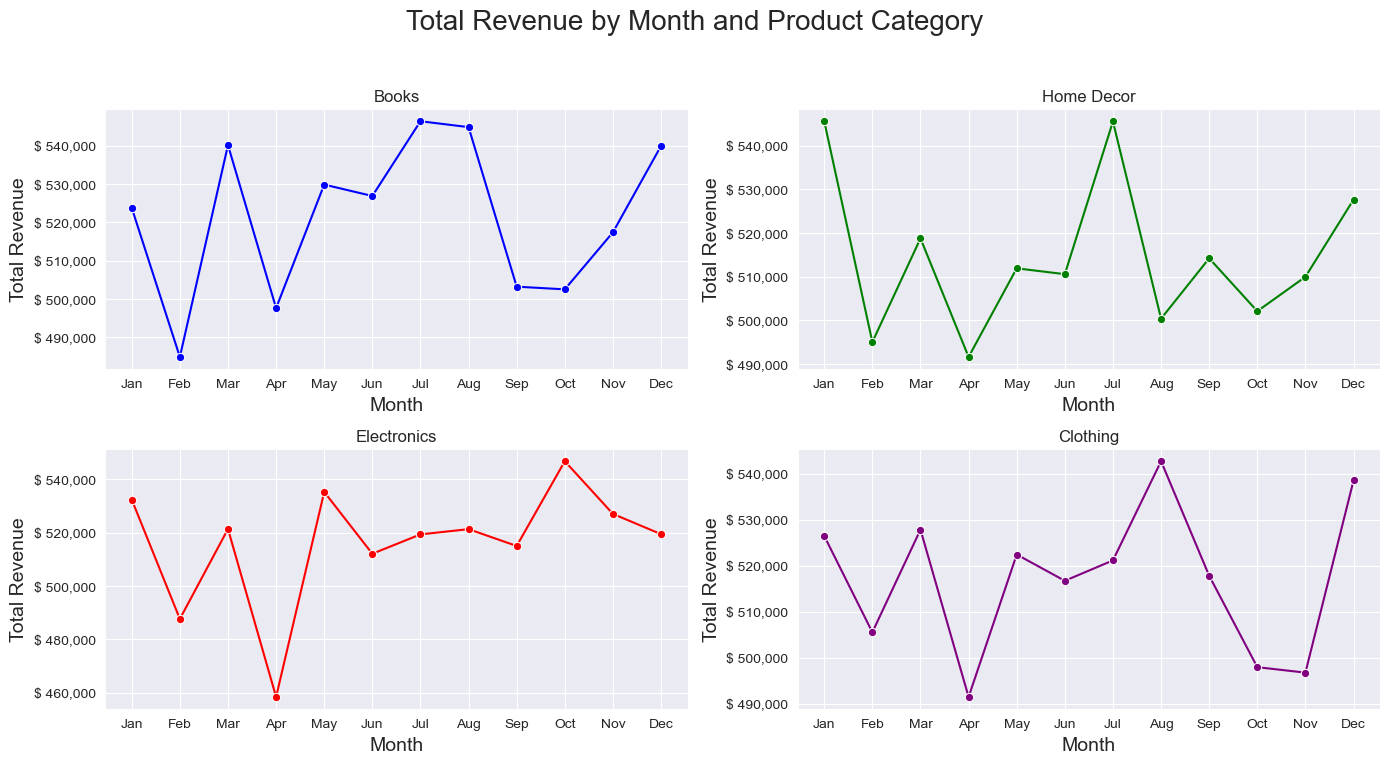

In [54]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8))  # Create 2x2 subplot structure
fig.suptitle('Total Revenue by Month and Product Category', fontsize=20)

categories = retails['ProductCategory'].unique()
colors = ['blue', 'green', 'red', 'purple']  # Define a list of colors for the plots
for ax, category, color in zip(axs.flatten(), categories, colors):
    sns.lineplot(data=retails[retails['ProductCategory'] == category], x='month', y='TotalAmount', marker='o', estimator=sum, ci=None, ax=ax, color=color)
    ax.set_title(category)
    ax.set_xlabel('Month', fontsize=14)
    ax.set_ylabel('Total Revenue', fontsize=14)
    ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('$ {x:,.0f}'))
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the main title
plt.show()
warnings.filterwarnings("ignore")

The line graph illustrates the monthly sales trends for four distinct product categories.

**Books:**

- Sales of **$540,000** or more occur in **March, July, August, and December**.
- In **January, May, June, and November**, sales range between **$(518 and 530)** .
- Lowest sales below **$500,000** happen in **February, April, September, and October**.

**Home Decor:**

- Highest sales, exceeding **$540,000**, were observed in **January and July**.
- Sales were below **$500,000** in **February and April.**
- Sales in the remaining months ranged between **$(500,000 and 530,000)**.

**Electronics:**

- Highest sales, exceeding **$540,000**, were observed in **October**.
- Lowest sales were recorded in **February and April**, of **$(485,000 and 460,000)** respectively.
- Sales in the remaining months ranged between **$(510,000 and 535,000)**.

**Clothing:**

- Highest sales, equal to or greater than **$540,000**, were observed in **August and December**.
- Lowest sales, falling below **$500,000**, were recorded in **April, October, and November**.
- Sales in the remaining months averaged around **$520,000**.

### Average Sales by Day of Week

In [29]:
# Setting DayOfWeek as category
retails['DayOfWeek']=retails['DayOfWeek'].astype('category')
retails['DayOfWeek']=retails['DayOfWeek'].cat.set_categories(
    new_categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    ordered = True,
)


In [55]:
retails.groupby("DayOfWeek")['TotalAmount'].mean().rename('Average Sales').apply(lambda x: "$ {:,.2f}".format(x))
warnings.filterwarnings("ignore")

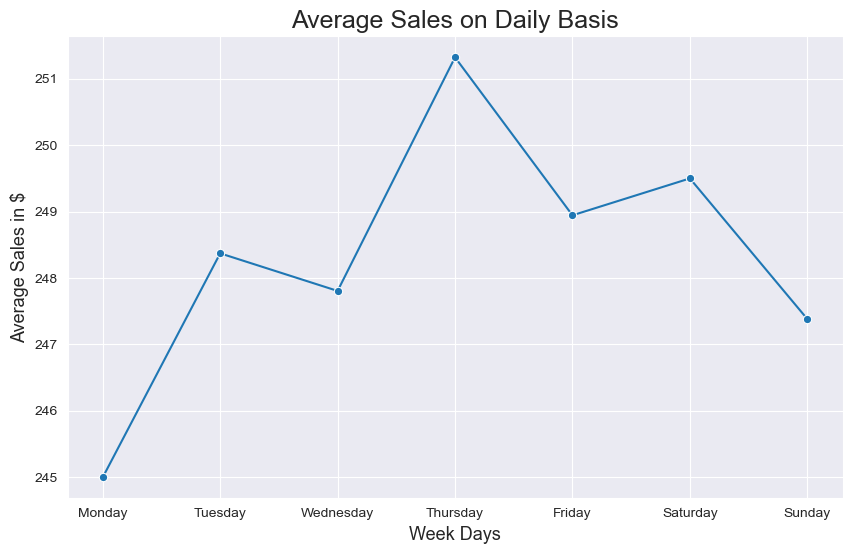

In [56]:
plt.figure(figsize = (10,6))
sns.lineplot(data = retails, x = 'DayOfWeek', y = 'TotalAmount', estimator = "mean", ci = None, marker = 'o')
plt.title("Average Sales on Daily Basis", fontsize = 18)
plt.ylabel("Average Sales in $", fontsize = 13)
plt.xlabel("Week Days", fontsize = 13)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.grid(True)
plt.show()
warnings.filterwarnings("ignore")

### Finding :
- More than **$ 251** of average sales have produced on **Thursday**.
- **Monday** experiences lowest average sales of **$ 245**.
- In remaining days, the average sales ranges **$(247.4 - 249.5)**

### Average Daily Sales By Product Category

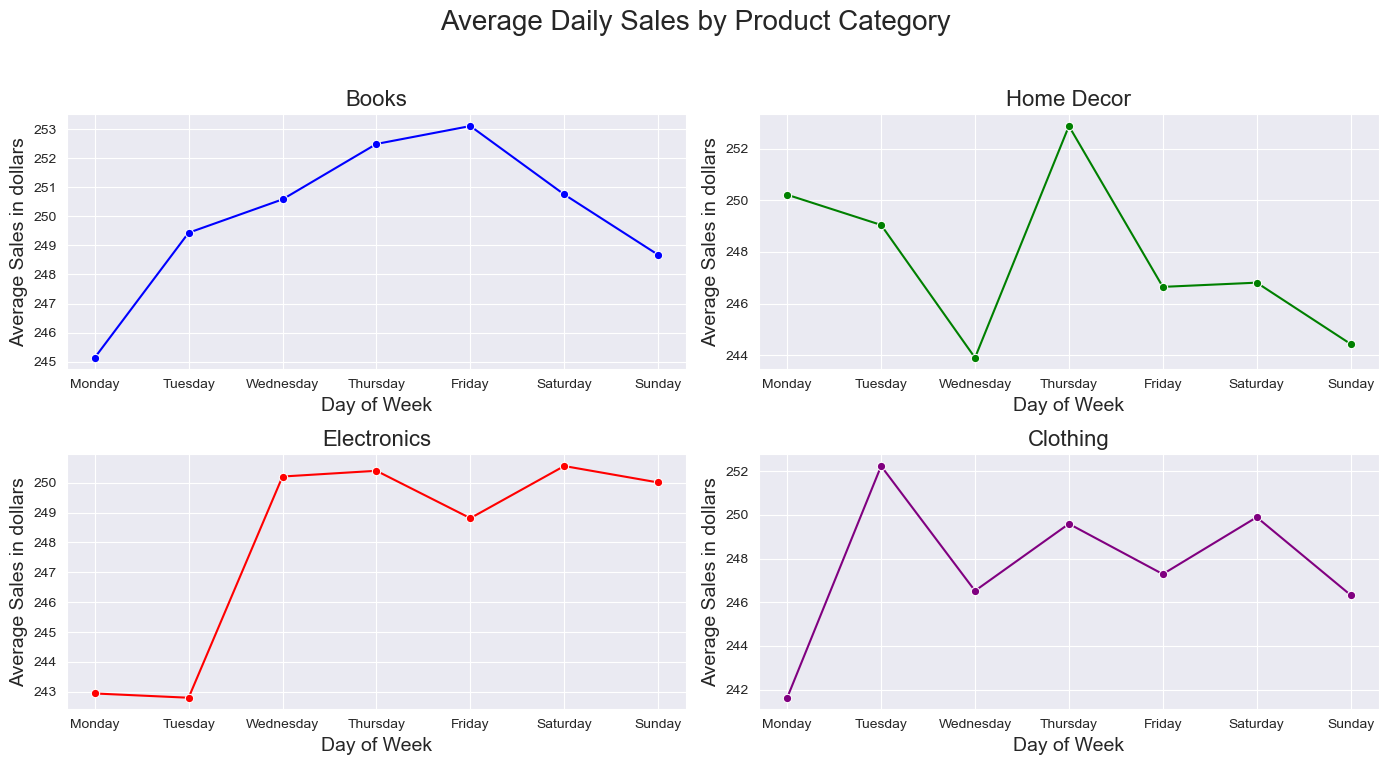

In [57]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8))  # Create 2x2 subplot structure
fig.suptitle('Average Daily Sales by Product Category', fontsize=20)

categories = retails['ProductCategory'].unique()
colors = ['blue', 'green', 'red', 'purple']  # Define a list of colors for the plots
for ax, category, color in zip(axs.flatten(), categories, colors):
    sns.lineplot(data=retails[retails['ProductCategory'] == category], x='DayOfWeek', y='TotalAmount', marker='o', estimator='mean', ci=None, ax=ax, color=color)
    ax.set_title(category, fontsize = 16)
    ax.set_xlabel('Day of Week', fontsize=14)
    ax.set_ylabel('Average Sales in dollars', fontsize=14)
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the main title
plt.show()
warnings.filterwarnings("ignore")

The line graph illustrates the Daily sales trends for four distinct product categories.

**Books:**
 
- From **Monday to Friday**, there's a consistent increase in sales from `$245 to $253`. However, after Friday, sales decline to `$249` over the weekend **(Saturday and Sunday)**.

**Home Decor:**

- Sales began at `$250` on **Monday**, gradually decreasing to `$244` approaching **Wednesday**. There was a steep increase to `$252` on **Thursday**, followed by another gradual decrease to `$244` on **Friday, Saturday, and Sunday**.

**Electronics:**

- The average sales hit their lowest point on **Monday** and **Tuesday** at `$243`. There was a sharp increase on **Wednesday** to `$250`, which remained consistent through **Sunday**.

**Clothing:**

- Sales were lowest on **Monday** at `$242`, then increased to `$252` on **Tuesday**. The remaining days experienced an average of `$248`.

## Customer Spending Patterns

### What is the average quantity and price per transaction?

In [33]:
print(f'Average Quantity per transaction : {retails["Quantity"].mean().round(0)}')
print(f'Average Price per transaction : {retails["TotalAmount"].mean().round(-2)}')

Average Quantity per transaction : 5.0
Average Price per transaction : 200.0


### What is the average quantity and price per transaction for each product category?

In [58]:
retails.groupby('ProductCategory').agg(
    Average_Quantity=('Quantity', lambda x: round(x.mean(), 0)),
    Average_Price=('TotalAmount', lambda x: round(x.mean(), 2))
)
warnings.filterwarnings("ignore")

### How does the payment method chosen by customers vary based on the total amount spent?

In [59]:
retails.groupby('PaymentMethod')['TotalAmount'].mean().round(2)
warnings.filterwarnings("ignore")

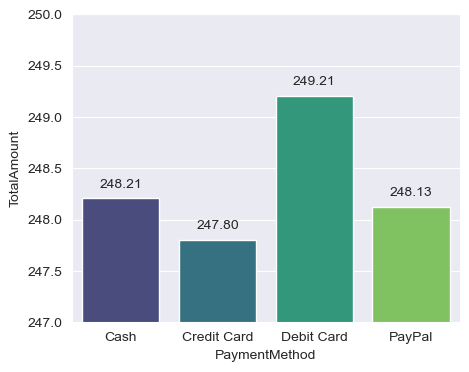

In [60]:
plt.figure(figsize=(5,4))
ax = sns.barplot(data = retails, x = 'PaymentMethod', y = 'TotalAmount', ci=None, palette='viridis')
plt.ylim(247, 250)

# Adding the text on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()
warnings.filterwarnings("ignore")

Above bar chart illustrates the variation of total amounts by payment methods. The observations are:
- There is not a very high difference in all methods, however **Debit Card** is usually used when payment is averaged around `249.21`.
- **Cash** and **Paypal** methods are frequently used for average payments around `248.17`.
- **Credit cards** have been used with lower payments of around `247.80`.

### Is there a correlation between the discount applied and the total amount spent by customers?

In [37]:
print(f"Correlation between discount applied and Total amount spent is : {round(retails['TotalAmount'].corr(retails['DiscountApplied(%)']), 3)}")

Correlation between discount applied and Total amount spent is : -0.088


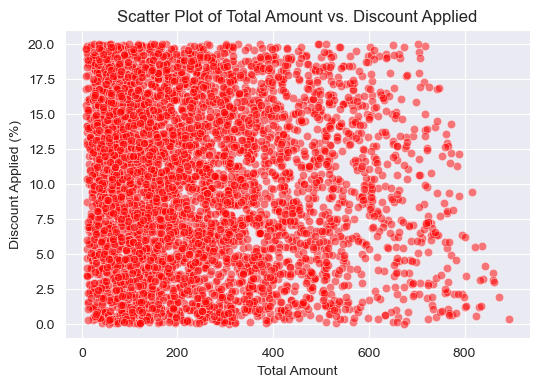

In [38]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=retails.sample(frac=0.05), x='TotalAmount', y='DiscountApplied(%)', alpha=0.5, color='red')
plt.title('Scatter Plot of Total Amount vs. Discount Applied')
plt.xlabel('Total Amount')
plt.ylabel('Discount Applied (%)')
plt.show()

Above scatter plot shows that there is not an strong relationship between `TotalAmount` and `DiscountApplied`, however a low negative correlation exists between them.

## Geographical Analysis:

### How does sales performance vary across different states?

In [39]:
retails_state = retails.groupby('State')['TotalAmount'].sum().round(-2).rename('Total Sales').sort_values(ascending = False).apply(lambda x: "$ {:,.0f}".format(x)).reset_index()
retails_state

,State,Total Sales
0,Armed Forces Americas,"$ 913,900"
1,Armed Forces Europe,"$ 898,800"
2,Armed Forces Pacific,"$ 880,900"
3,Marshall Islands,"$ 403,300"
4,Maine,"$ 400,100"
...,...,...
57,Nevada,"$ 357,800"
58,Michigan,"$ 356,400"
59,American Samoa,"$ 352,500"
60,North Carolina,"$ 351,600"


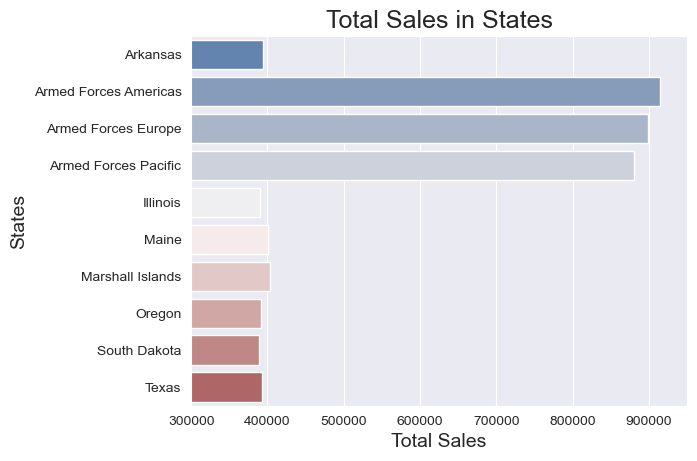

In [61]:
top_10_states = retails.groupby('State')['TotalAmount'].sum().reset_index().query('TotalAmount > 388000')
sns.barplot(data = top_10_states, x = 'TotalAmount', y = 'State', estimator = sum, palette = "vlag")
plt.title("Total Sales in States", fontsize = 18)
plt.xlabel('Total Sales', fontsize = 14)
plt.ylabel('States', fontsize = 14)
plt.xlim(300000, 950000)
plt.show()
warnings.filterwarnings("ignore")

The **Bar chart** shows that:
- `Armed Forces` states have produced higher sales exceeding `$900,000`
- Sales of `$400,000` or lower were produced in other states.

### Are there specific states where certain product categories perform exceptionally well or poorly?

In [62]:
states_and_products = retails.pivot_table(index='State', columns='ProductCategory', values='TotalAmount', aggfunc='sum', fill_value=0)
states_and_products.sort_values(by='Books', ascending = False).applymap(lambda x: "$ {:,.0f}".format(x))
warnings.filterwarnings("ignore")

In [42]:
pip install --upgrade seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


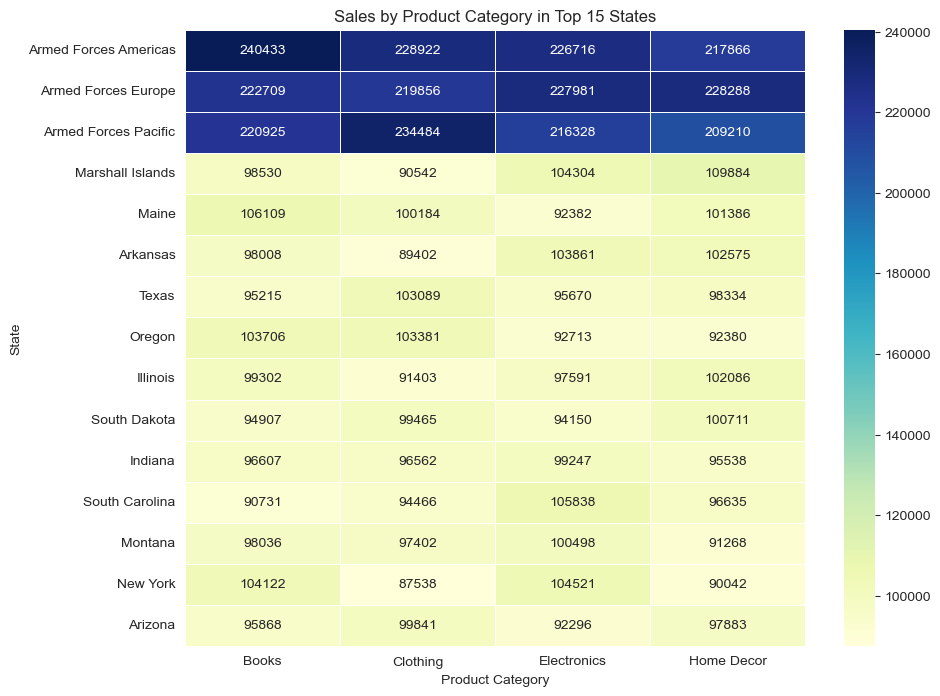

In [43]:

# Creating a pivot table without sorting by 'Books'
states_and_products = retails.pivot_table(index='State', columns='ProductCategory', values='TotalAmount', aggfunc='sum', fill_value=0)

# Selecting the top 15 states based on total sales across all categories
top_15_states = states_and_products.sum(axis=1).nlargest(15).index

# Filtering the pivot table to include only the top 15 states
top_15_states_data = states_and_products.loc[top_15_states]

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(top_15_states_data, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title('Sales by Product Category in Top 15 States')
plt.ylabel('State')
plt.xlabel('Product Category')
plt.show()

In this heatmap, it's evident that the **armed states** consistently lead in sales across all categories, while sales in other states remain relatively lower and stable, showing minimal fluctuations.

### What is the distribution of payment methods used across different states?

In [44]:
state_payment = (pd.crosstab(retails['State'], retails['PaymentMethod'], normalize='index') * 100).round(2)
state_payment.astype(str)+'%'

PaymentMethod,Cash,Credit Card,Debit Card,PayPal
State,,,,
Alabama,25.49%,24.6%,25.75%,24.16%
Alaska,25.45%,24.59%,23.93%,26.04%
American Samoa,22.71%,26.63%,26.5%,24.16%
Arizona,26.25%,24.74%,26.05%,22.96%
Arkansas,23.48%,26.07%,25.68%,24.77%
...,...,...,...,...
Virginia,22.95%,24.5%,24.76%,27.79%
Washington,25.77%,24.13%,24.27%,25.84%
West Virginia,25.78%,24.67%,23.83%,25.72%


The pivot_table analysis indicates:
- Consistency is observed in the distribution of payment methods across all states, with minimal fluctuation.
- While certain states exhibit slight preferences for specific methods, the overall variations are relatively minor.

## Temporal analysis:

### Are there any notable changes in customer behavior or spending habits over time?

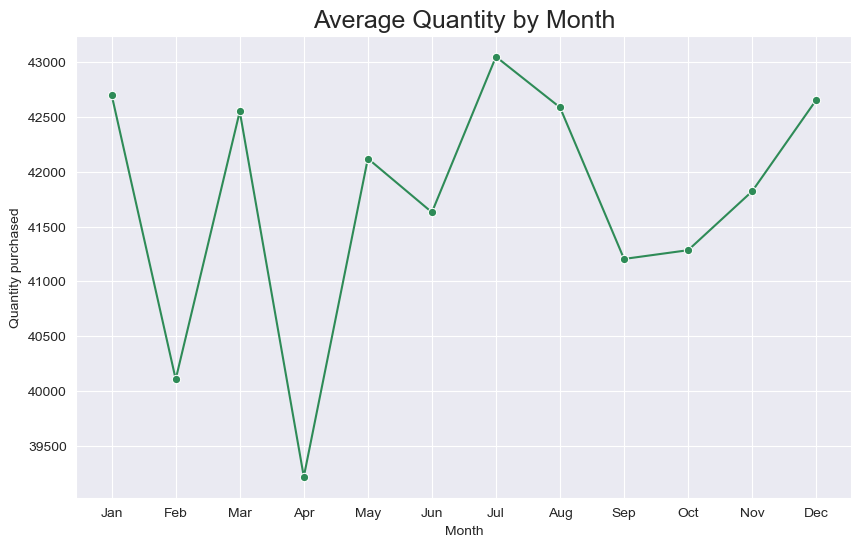

In [63]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
sns.lineplot(data=retails, x='month', y='Quantity', marker='o', color='seagreen', estimator = 'sum', ci =None) 
plt.xlabel('Month')
plt.ylabel('Quantity purchased')
plt.title('Average Quantity by Month', fontsize = 18)
plt.grid(True)
plt.show()
warnings.filterwarnings("ignore")

Above line chart expresses customer behavior over the past 12 months : 
- The total quantity bought by customers is around `42000` - `43000` in months **Jan**, **Mar**, **May**, **July**, **Aug** and **Dec**.
- Total quantity was reduced to `40000` in **Feb** and under `39300` in **Apr**.
- The quantity was around `41200` in **Sep** which consistently rise through last 4 months.

# Key Findings:



1. **Sales Distribution by Category**:
   - Books contribute the highest to total revenue at `25.2%`, followed closely by other categories at slightly less than `25%` each.
   - Books consistently show higher sales in March, July, August, and December, while experiencing lower sales in February, April, September, and October.
   - Home Decor and Clothing also exhibit seasonal variations in sales, with peaks in January, July, August, and December.
   - Electronics show a notable peak in October, with lower sales in February and April.

2. **Sales by Day of the Week**:
   - Thursday consistently sees the highest average sales across all categories, followed by a gradual decline towards Monday, which records the lowest average sales.
   - Books show a steady increase in sales from Monday to Friday, with a decline over the weekend.
   - Home Decor and Electronics also follow a similar pattern with varying average sales throughout the week.
   - Clothing shows a peak on Tuesday with decreasing sales towards the weekend.

3. **Payment Methods**:
   - Debit cards are preferred for transactions averaging around `$249.21`, followed closely by cash and PayPal at `$248.17`.
   - Credit cards are used for lower average payments of approximately `$247.80`.

4. **Relationship between Total Amount and Discount Applied**:
   - There is a low negative correlation between Total Amount and Discount Applied, indicating that as discounts increase, the total amount tends to decrease slightly.

5. **Sales by State**:
   - Armed Forces states consistently lead in sales across all categories, exceeding `$900,000`, while other states have lower sales, typically below `$400,000`.
   - There is minimal fluctuation in payment method distribution across states, with slight preferences observed but overall minor variations.

6. **Total Quantity Bought by Customers**:
   - Total quantities range between `42,000` to` 43,000` in specific months (Jan, Mar, May, July, Aug, Dec), indicating peak buying periods.
   - Quantities drop to `40,000` in February and below `39,300` in April, suggesting lower buying trends during these months.
   - Quantity increases consistently towards the end of the year, reaching around `41,200` in September and rising further in the last four months.

# Recommendations


1. **Category-Specific Strategies**:
   - For Books: Capitalize on peak sales months (March, July, August, December) by offering targeted promotions or exclusive deals to drive higher sales during these periods.
   - For Home Decor and Clothing: Align marketing efforts with peak months (January, July, August, December) to leverage higher consumer interest and boost sales through seasonal campaigns.
   - For Electronics: Focus on promoting products during the peak month of October and consider offering special discounts or bundles to attract more customers.

2. **Optimize Sales by Day**:
   - Leverage the higher average sales on Thursdays by running flash sales, limited-time offers, or promotions specifically targeted for this day.
   - Consider adjusting pricing or launching promotions to stimulate sales on Mondays, which consistently show lower average sales, to balance out the weekly sales distribution.

3. **Payment Method Optimization**:
   - Encourage the use of debit cards by offering incentives or discounts for transactions, as they are the preferred method for higher average payments.
   - Streamline the checkout process for credit card users to improve convenience and potentially increase usage, especially for smaller purchases.

4. **Discount and Total Amount Relationship**:
   - Monitor the impact of discounts on total amounts closely to ensure that discounts are effectively driving sales without significantly reducing overall revenue.
   - Consider implementing dynamic pricing strategies or targeted discount campaigns to maintain a balance between discount offers and total revenue generation.

5. **State-Specific Marketing**:
   - Allocate resources and marketing efforts strategically to capitalize on the higher sales in Armed Forces states, while also maintaining a consistent presence and engagement in other states to maximize overall sales.

6. **Quantity Management**:
   - Plan inventory levels and promotional activities based on seasonal buying trends to ensure optimal stock availability during peak buying months and avoid overstocking during slower periods.
   - Monitor and analyze customer buying patterns to anticipate demand fluctuations and adjust procurement and marketing strategies accordingly.
